<img src="https://www.promocionachile.cl/img/logos/uai.JPG" width="400" alt="utfsm-logo" align="left"/>

# LEC de Probabilidad y Estadística, Viña del mar.
## Clase 08
### Profesor: Fabián Ramírez

# Objetivos:
* Intoducir Teoricamente un modelo de regresión simple.
* Intervalos de confianza y test de hipótesis para un modelo de regresión.

In [1]:
# Generar datos
set.seed(0)
x = rweibull(100,2)
y = 4*rep(1,100)+5*x + rnorm(100,0,1)
data=data.frame(x,y)

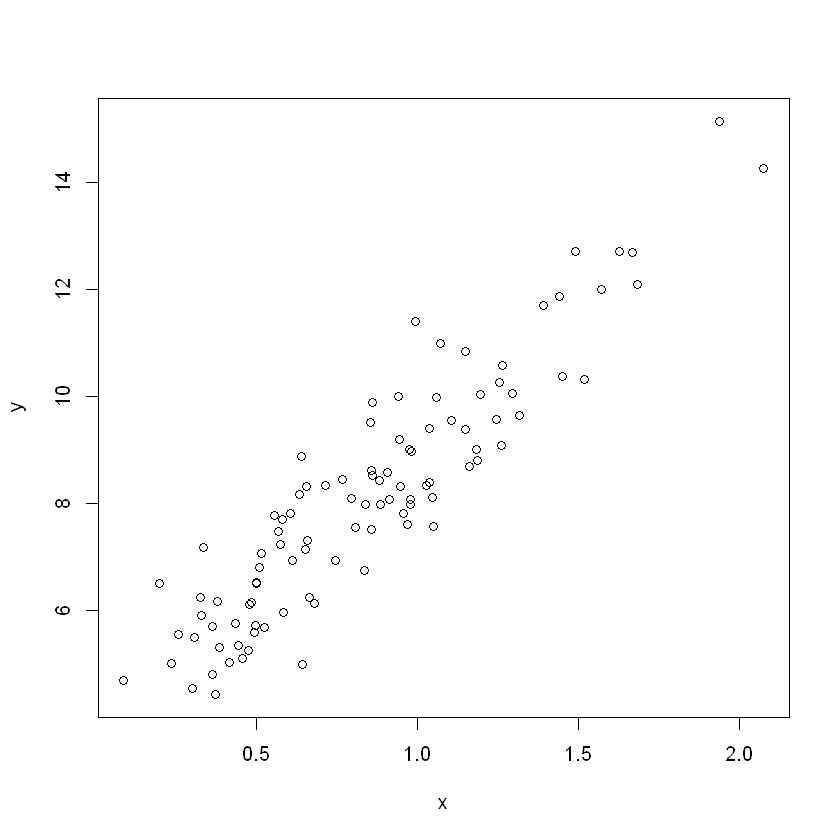

In [2]:
plot(data)

Nota que existe una tendencia.

In [24]:
cor(x,y)

[1] 0.9187366

Nota que existe correlación

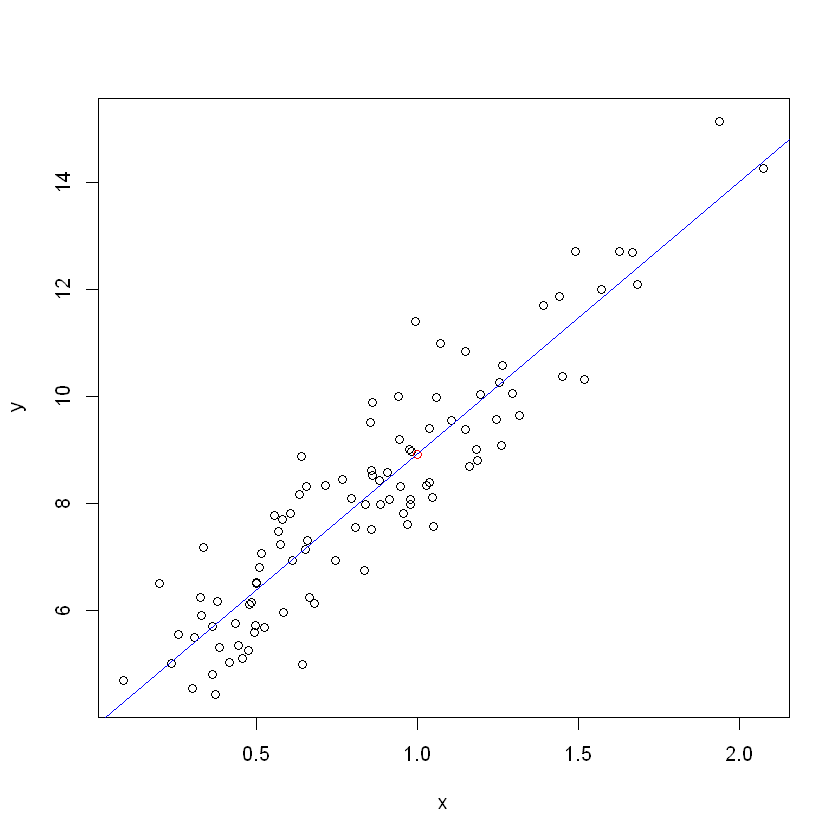

In [22]:
#data
# yi = b0 + b1*xi + error
reg=lm(y~x,data)
# Cuanto vale aproximadamente y si el x vale 1
pred_x = reg$coef[1] + reg$coef[2]*1
plot(x,y)
points(1,pred_x,col='red')
abline(reg,col='blue')

In [24]:
confint(reg,level=0.99)

,0.5 %,99.5 %
(Intercept),3.288916,4.374250
x,4.507082,5.667506


In [27]:
summary(reg)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11167 -0.74662  0.03271  0.56906  2.52299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.8316     0.2066   18.55   <2e-16 ***
x             5.0873     0.2209   23.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8903 on 98 degrees of freedom
Multiple R-squared:  0.8441,	Adjusted R-squared:  0.8425 
F-statistic: 530.5 on 1 and 98 DF,  p-value: < 2.2e-16


In [25]:
cor(x,y)^2

[1] 0.8440769

In [51]:
set.seed(0)
t = seq(1,60)
T = 5*exp(-0.07*t) + rnorm(60,0,0.1)


Call:
lm(formula = T ~ t)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6986 -0.4987 -0.1348  0.3378  1.7885 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.063115   0.151960   20.16   <2e-16 ***
t           -0.063319   0.004333  -14.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5812 on 58 degrees of freedom
Multiple R-squared:  0.7864,	Adjusted R-squared:  0.7828 
F-statistic: 213.6 on 1 and 58 DF,  p-value: < 2.2e-16


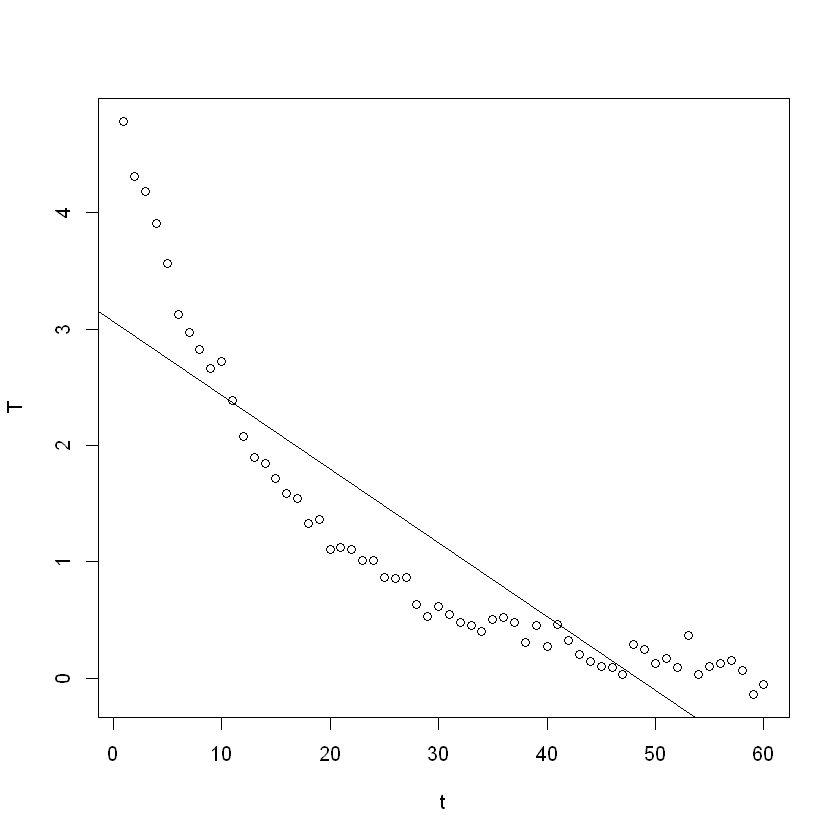

In [54]:
plot(t,T)
reg1=lm(T~t)
abline(reg1)
summary(reg1)

Warning message in log(T):
"Se han producido NaNs"



Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75362 -0.06323 -0.00203  0.09021  1.18589 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.635217   0.106307   15.38   <2e-16 ***
x           -0.072166   0.003134  -23.03   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3996 on 56 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.9045,	Adjusted R-squared:  0.9028 
F-statistic: 530.2 on 1 and 56 DF,  p-value: < 2.2e-16


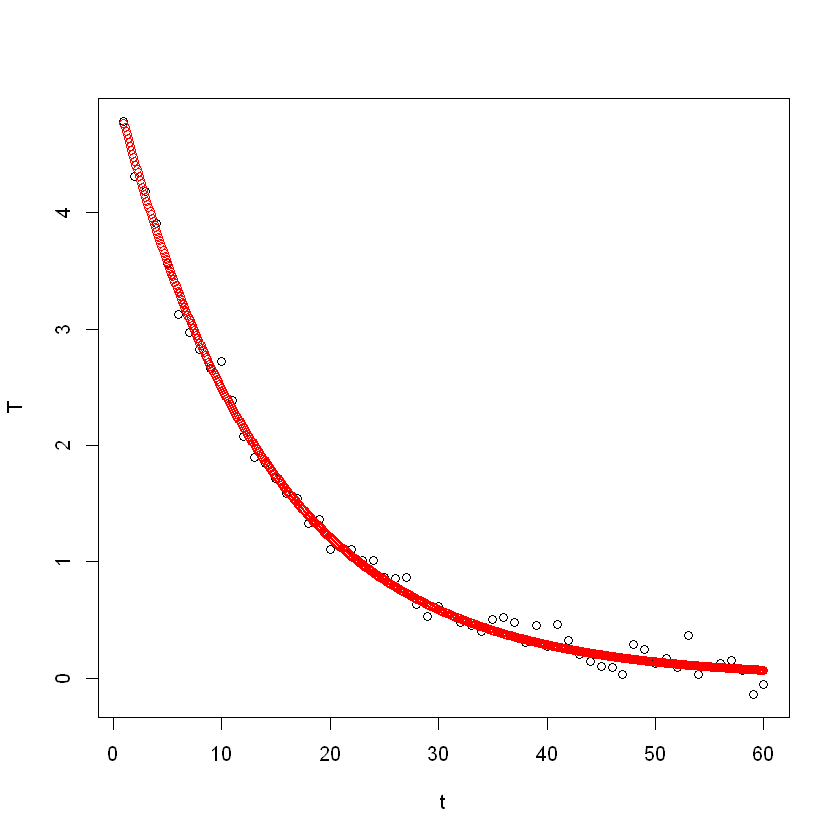

In [64]:
plot(t,T)
# T = A*exp(-Kt)
# log(T) = Log(A) - Kt
# Y = log(T), b0 = Log(A), b1 = -K, t=X
x = t
y = log(T)
reg2=lm(y~x)
summary(reg2)
b0 = reg2$coef[1]
b1 = reg2$coef[2]
A = exp(b0)
k = -b1
pp = seq(1,60,by=0.1)
pred = A*exp(-k*pp)
points(pp,pred,col='red')

seq {base},R Documentation
...,arguments passed to or from methods.
"from, to",the starting and (maximal) end values of the sequence. Of length 1 unless just from is supplied as an unnamed argument.
by,number: increment of the sequence.
length.out,"desired length of the sequence. A non-negative number, which for seq and seq.int will be rounded up if fractional."
along.with,take the length from the length of this argument.


[1]  1.56616803  1.46190445  1.43172201  1.36255521  1.27113729  1.14142880
 [7]  1.08865463  1.03906512  0.97922132  1.00187811  0.87188929  0.73171946
[13]  0.64072452  0.61389255  0.54218895  0.46388991  0.43588352  0.28448548
[19]  0.31185355  0.10366696  0.11973725  0.10404021  0.01269084  0.01221394
[25] -0.14715632 -0.15025381 -0.14625661 -0.45382053 -0.63824683 -0.48295958
[31] -0.60272634 -0.73813681 -0.79191784 -0.92179153 -0.68489531 -0.65876661
[37] -0.74588101 -1.18159246 -0.79867025 -1.28693535 -0.77808447 -1.13817491
[43] -1.60355527 -1.92010238 -2.32684111 -2.37283340 -3.51019645 -1.24018739
[49] -1.40592818 -2.05374223 -1.78741091 -2.36881627 -1.00369106 -3.36449295
[55] -2.29351698 -2.08570426 -1.86870812 -2.67389887         NaN         NaN